In [1]:
# Importing libraries
import sys
sys.path.insert(0,
                '/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tau_classification/')

from base import *
from constants import *
sys.path.insert(0,
                '/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tuning_parameters/')

from tuning import * 
from extra_metrics_training import *
from tuning_constants import * 

In [2]:
import pandas as pd
import numpy as np 
import random 

from sklearn import preprocessing 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib


In [3]:
import joblib

In [4]:
path = "/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tau_classification/Untrained/Training_data/cortical_regions/"
filename = "training.txt"

# Create tau database object 
cortical_data = TauDataBase(path = path,
                            filename = filename) 

# Prepping data to train tau classifier for cortical regions
cortical_data.classifier2_prep()

# Check data
print(cortical_data.c2_data['Class'].value_counts())
print(cortical_data.c2_X_train.shape)

Others    2913
CB         661
TA         254
NFT        126
Name: Class, dtype: int64
(3954, 54)


In [6]:
# Tuning 
rf_random = RandomizedSearchCV(pipeline,
                               param_distributions=random_grid, 
                               n_iter=100,
                               cv=10,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1,
                               refit='PR_AUC',
                               scoring={
                                'PR_AUC':precision_recall_auc_tau,
                                'roc_auc_ovr_weighted':'roc_auc_ovr_weighted',
                                'roc_auc_ovo':'roc_auc_ovo',
                                'balanced_accuracy':'balanced_accuracy',
                                'f1_weighted':'f1_weighted',
                                'CB_accuracy': CB_acc,
                                'NFT_accuracy':NFT_acc,
                                'Others_accuracy':Others_acc,
                                'TA_accuracy':TA_acc,
                                'CB_as_NFT':CB_as_NFT,
                                'CB_as_Others':CB_as_Others,
                                'CB_as_TA':CB_as_TA,
                                'NFT_as_CB':NFT_as_CB,
                                'NFT_as_Others':NFT_as_Others,
                                'NFT_as_TA':NFT_as_TA,
                                'Others_as_CB':Others_as_CB,
                                'Others_as_NFT':Others_as_NFT,
                                'Others_as_TA':Others_as_TA,
                                'TA_as_CB':TA_as_CB,
                                'TA_as_NFT':TA_as_NFT,
                                'TA_as_Others':TA_as_Others
                                        })

rf_random.fit(cortical_data.c2_X_train,
              cortical_data.c2_Y_train)


print(rf_random.best_score_)
print(rf_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
0.9767514582962116
{'selector__n_features_to_select': 40, 'clf__sampling_strategy': 'not majority', 'clf__random_state': 42, 'clf__n_estimators': 800, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_samples': 0.75, 'clf__max_features': 0.2, 'clf__max_depth': 10, 'clf__class_weight': 'balanced'}


In [8]:
# save object using joblib
joblib.dump(rf_random, 'cortical_random_search_update3.sav')

['cortical_random_search_update3.sav']

In [9]:
# Digging into more details 
print("PR-AUC:",
      rf_random.cv_results_['mean_test_PR_AUC'][rf_random.best_index_]*100)
print("ROC-AUC:",
      rf_random.cv_results_['mean_test_roc_auc_ovr_weighted'][rf_random.best_index_]*100)
print("ROC-AUC:",
      rf_random.cv_results_['mean_test_roc_auc_ovo'][rf_random.best_index_]*100)

print("Balanced accuracy:",
      rf_random.cv_results_['mean_test_balanced_accuracy'][rf_random.best_index_]*100)

print("F1_weighted:",
      rf_random.cv_results_['mean_test_f1_weighted'][rf_random.best_index_]*100)

print("CB accuracy:",
      rf_random.cv_results_['mean_test_CB_accuracy'][rf_random.best_index_]*100)

print("NFT accuracy:",
      rf_random.cv_results_['mean_test_NFT_accuracy'][rf_random.best_index_]*100)

print("Others accuracy:",
      rf_random.cv_results_['mean_test_Others_accuracy'][rf_random.best_index_]*100)

print("TA accuracy:",
      rf_random.cv_results_['mean_test_TA_accuracy'][rf_random.best_index_]*100)


print("Classified CB as NFT:",
      rf_random.cv_results_['mean_test_CB_as_NFT'][rf_random.best_index_]*100)

print("Classified CB as Others:",
      rf_random.cv_results_['mean_test_CB_as_Others'][rf_random.best_index_]*100)

print("Classified CB as TA:",
      rf_random.cv_results_['mean_test_CB_as_TA'][rf_random.best_index_]*100)

print("Classified NFT as CB:",
      rf_random.cv_results_['mean_test_NFT_as_CB'][rf_random.best_index_]*100)

print("Classified NFT as Others:",
      rf_random.cv_results_['mean_test_NFT_as_Others'][rf_random.best_index_]*100)

print("Classified NFT as TA:",
      rf_random.cv_results_['mean_test_NFT_as_TA'][rf_random.best_index_]*100)

print("Classified Others as CB:",
      rf_random.cv_results_['mean_test_Others_as_CB'][rf_random.best_index_]*100)

print("Classified Others as NFT:",
      rf_random.cv_results_['mean_test_Others_as_NFT'][rf_random.best_index_]*100)

print("Classified Others as TA:",
      rf_random.cv_results_['mean_test_Others_as_TA'][rf_random.best_index_]*100)


print("Classified TA as CB:",
      rf_random.cv_results_['mean_test_TA_as_CB'][rf_random.best_index_]*100)

print("Classified TA as NFT:",
      rf_random.cv_results_['mean_test_TA_as_NFT'][rf_random.best_index_]*100)

print("Classified TA as Others:",
      rf_random.cv_results_['mean_test_TA_as_Others'][rf_random.best_index_]*100)
                                                       

PR-AUC: 97.67514582962116
ROC-AUC: 99.78167402959244
ROC-AUC: 99.40033920517106
Balanced accuracy: 91.93780451155253
F1_weighted: 95.95573622274017
CB accuracy: 81.08322026232473
NFT accuracy: 91.34615384615385
Others accuracy: 99.6910747069623
TA accuracy: 95.63076923076925
Classified CB as NFT: 3.6363636363636362
Classified CB as Others: 12.856173677069199
Classified CB as TA: 2.4242424242424243
Classified NFT as CB: 2.371794871794872
Classified NFT as Others: 0.0
Classified NFT as TA: 6.282051282051282
Classified Others as CB: 0.24031445652685593
Classified Others as NFT: 0.034364261168384876
Classified Others as TA: 0.03424657534246575
Classified TA as CB: 0.7846153846153846
Classified TA as NFT: 2.0
Classified TA as Others: 1.5846153846153848


{'selector__n_features_to_select': 40, 'clf__sampling_strategy': 'not majority', 'clf__random_state': 42, 'clf__n_estimators': 800, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_samples': 0.75, 'clf__max_features': 0.2, 'clf__max_depth': 10, 'clf__class_weight': 'balanced'}


In [11]:
cortical_classifier_hyperparams = [
    ('normalizer', MinMaxScaler()),
    ('selector', RFE(RandomForestClassifier(
        random_state=42),
        n_features_to_select=40)),
    ('clf', BalancedRandomForestClassifier(
        random_state=42,
        sampling_strategy='not majority',
        n_estimators=800,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=0.2,
        max_depth=10,
        max_samples=0.75,
        class_weight='balanced'))]
        
# 10-fold cross validation
model = TauClassifierTuning(hyperparameters=cortical_classifier_hyperparams)
model.find_bestparameters(X=cortical_data.c2_X_train,
                          Y=cortical_data.c2_Y_train)


In [21]:
loaded_model.best_parameters

{0: (0.20178264912940796,
  0.9461222841732907,
  0.9392187191317515,
  0.9545454545454545),
 1: (0.6822153285884559,
  0.9098161065987153,
  0.9409706959706959,
  0.8903846153846153),
 2: (0.7611313612515783,
  0.9922817367544002,
  0.9921489382138381,
  0.9924504542672882),
 3: (0.5047927492593813,
  0.9566895472267282,
  0.9541859991859992,
  0.960923076923077)}

In [13]:
model.cv_withthresholding(best_parameters=model.best_parameters,
                          X=cortical_data.c2_X_train,
                          Y=cortical_data.c2_Y_train,
                          X_location = cortical_data.c2_train_location)


In [14]:
# Confusion matrix across 10 folds, WITH thresholding 
print('with thresholding (non-calibrated) ACC :', mean(model.cv_accuraciesT)*100)
print('Macro avg F1 ', 
      mean([i['macro avg']['f1-score'] for i in model.cv_reportsT])*100)
print('Weighted avg F1 ',
      mean([i['weighted avg']['f1-score'] for i in model.cv_reportsT])*100)
print("--------------------------")
cf_t = sum(model.cv_confusion_matricesT)
final_cm_t =  cf_t.astype('float') / cf_t.sum(axis=1)[:, np.newaxis]*100
print(cf_t)
print(final_cm_t)
print("--------------------------")
print("CB accuracy",final_cm_t[0][0])
print("NFT accuracy",final_cm_t[1][1])
print("Others accuracy",final_cm_t[2][2])
print("TA accuracy",final_cm_t[3][3])
print('------------------------------')
# F1-score per class: 
print('CB f1-score ',mean([i['CB']['f1-score'] for i in model.cv_reportsT])*100)
print('CB precision ',mean([i['CB']['precision'] for i in model.cv_reportsT])*100)
print('CB recall ',mean([i['CB']['recall'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('NFT f1-score ',mean([i['NFT']['f1-score'] for i in model.cv_reportsT])*100)
print('NFT precision ',mean([i['NFT']['precision'] for i in model.cv_reportsT])*100)
print('NFT recall ',mean([i['NFT']['recall'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('Others f1-score ',mean([i['Others']['f1-score'] for i in model.cv_reportsT])*100)
print('Others precision ',mean([i['Others']['precision'] for i in model.cv_reportsT])*100)
print('Others recall ',mean([i['Others']['recall'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('TA f1-score ',mean([i['TA']['f1-score'] for i in model.cv_reportsT])*100)
print('TA precision ',mean([i['TA']['precision'] for i in model.cv_reportsT])*100)
print('TA recall ',mean([i['TA']['recall'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('Macro avg precision',
      mean([i['macro avg']['precision'] for i in model.cv_reportsT])*100)
print('Macro avg recall ',
      mean([i['macro avg']['recall'] for i in model.cv_reportsT])*100)

with thresholding (non-calibrated) ACC : 94.60684324317958
Macro avg F1  94.46453764033144
Weighted avg F1  97.77554915158821
--------------------------
[[ 607   12   20   10]
 [   8  107    0    5]
 [  24    0 2877    0]
 [   8    0    0  235]]
[[93.52850539  1.84899846  3.0816641   1.54083205]
 [ 6.66666667 89.16666667  0.          4.16666667]
 [ 0.82730093  0.         99.17269907  0.        ]
 [ 3.29218107  0.          0.         96.70781893]]
--------------------------
CB accuracy 93.52850539291218
NFT accuracy 89.16666666666667
Others accuracy 99.17269906928645
TA accuracy 96.70781893004116
------------------------------
CB f1-score  93.6350565125403
CB precision  94.02572419812995
CB recall  93.47571413801252
--------------------------
NFT f1-score  89.60510953314551
NFT precision  92.59386446886447
NFT recall  89.07925407925407
--------------------------
Others f1-score  99.24034954427611
Others precision  99.31113436762082
Others recall  99.17240475545174
----------------------

In [36]:
model = loaded_model
info = pd.concat(model.cv_x_testT)
outcome = pd.DataFrame(data={'truth':pd.concat(model.cv_y_testT),
                             'predicted':np.concatenate(model.cv_y_predictsT).ravel().tolist(),
                             'Centroid_X':info['Centroid_X'],
                             'Centroid_Y':info['Centroid_Y'],
                             'Image':info['Image']})
outcome.head()

,truth,predicted,Centroid_X,Centroid_Y,Image
0,TA,TA,16342.6,2246.2,747316.svs_TRAINING_5
1,CB,CB,16171.2,2253.8,747316.svs_TRAINING_5
2,Others,Others,14968.7,2261.8,747316.svs_TRAINING_5
3,CB,CB,15666.5,2264.0,747316.svs_TRAINING_5
4,Others,Others,14946.4,2265.1,747316.svs_TRAINING_5


In [37]:
# Check incorrect cases

outcome[(outcome['truth']=='NFT')& (outcome['predicted']=='CB')]

,truth,predicted,Centroid_X,Centroid_Y,Image
7,NFT,CB,16543.7,2282.4,747316.svs_TRAINING_5
1586,NFT,CB,9316.5,16215.5,747316.svs_TRAINING_5
2063,NFT,CB,16092.7,14114.2,771746.svs_TRAINING_5
2314,NFT,CB,17078.1,15641.2,771746.svs_TRAINING_5
2521,NFT,CB,17028.4,3013.7,771791.svs_TRAINING_5
3342,NFT,CB,17993.9,3935.2,771791.svs_TRAINING_5
3470,NFT,CB,4074.8,4177.0,771791.svs_TRAINING_5
3573,NFT,CB,3946.6,4588.0,771791.svs_TRAINING_5


In [16]:
model.cv_nothresholding(X=cortical_data.c2_X_train,
                        Y=cortical_data.c2_Y_train,
                        X_location = cortical_data.c2_train_location)

In [17]:
#Confusion matrix across 10 folds, WITHOUT thresholding 
print('with no thresholding:',
      mean(model.cv_accuracies)*100)
print('Macro avg F1 ',
      mean([i['macro avg']['f1-score'] for i in model.cv_reports])*100)
print('Weighted avg F1 ',
      mean([i['weighted avg']['f1-score'] for i in model.cv_reports])*100)
print("--------------------------")
cf = sum(model.cv_confusion_matrices)
final_cm =  cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]*100
print(cf)
print(final_cm)
print("--------------------------")
print("CB accuracy",final_cm[0][0])
print("NFT accuracy",final_cm[1][1])
print("Others accuracy",final_cm[2][2])
print("TA accuracy",final_cm[3][3])
print('------------------------------')
# F1-score per class: 
print('CB f1-score ',mean([i['CB']['f1-score'] for i in model.cv_reports])*100)
print('CB precision ',mean([i['CB']['precision'] for i in model.cv_reports])*100)
print('CB recall ',mean([i['CB']['recall'] for i in model.cv_reports])*100)
print("--------------------------")
print('NFT f1-score ',mean([i['NFT']['f1-score'] for i in model.cv_reports])*100)
print('NFT precision ',mean([i['NFT']['precision'] for i in model.cv_reports])*100)
print('NFT recall ',mean([i['NFT']['recall'] for i in model.cv_reports])*100)
print("--------------------------")
print('Others f1-score ',mean([i['Others']['f1-score'] for i in model.cv_reports])*100)
print('Others precision ',mean([i['Others']['precision'] for i in model.cv_reports])*100)
print('Others recall ',mean([i['Others']['recall'] for i in model.cv_reports])*100)
print("--------------------------")
print('TA f1-score ',mean([i['TA']['f1-score'] for i in model.cv_reports])*100)
print('TA precision ',mean([i['TA']['precision'] for i in model.cv_reports])*100)
print('TA recall ',mean([i['TA']['recall'] for i in model.cv_reports])*100)
print("--------------------------")
print('Macro avg precision',
      mean([i['macro avg']['precision'] for i in model.cv_reports])*100)
print('Macro avg recall ',
      mean([i['macro avg']['recall'] for i in model.cv_reports])*100)

with no thresholding: 91.93780451155253
Macro avg F1  91.39460633528196
Weighted avg F1  95.95573622274016
--------------------------
[[ 536   24   85   16]
 [   3  115    0    8]
 [   7    1 2904    1]
 [   2    5    4  243]]
[[8.10892587e+01 3.63086233e+00 1.28593041e+01 2.42057489e+00]
 [2.38095238e+00 9.12698413e+01 0.00000000e+00 6.34920635e+00]
 [2.40302094e-01 3.43288706e-02 9.96910402e+01 3.43288706e-02]
 [7.87401575e-01 1.96850394e+00 1.57480315e+00 9.56692913e+01]]
--------------------------
CB accuracy 81.08925869894101
NFT accuracy 91.26984126984127
Others accuracy 99.69104016477857
TA accuracy 95.66929133858267
------------------------------
CB f1-score  88.51755030742436
CB precision  97.88002023532525
CB recall  81.08322026232474
--------------------------
NFT f1-score  85.54988344988345
NFT precision  82.11013751806591
NFT recall  91.34615384615384
--------------------------
Others f1-score  98.34517560528816
Others precision  97.04168873536513
Others recall  99.6910747

In [18]:
joblib.dump(model,'cortical_cv_results_updated3.sav')

['cortical_cv_results_updated3.sav']

In [8]:
# The final model
loaded_model = joblib.load('/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tuning_parameters/Final/results/cortical_cv_results_updated3.sav')

In [37]:
# find out proportion of ambiguous cells 
predicted = (sum(loaded_model.cv_y_predictsT, []))
print('total:',len(predicted))
print(set(predicted))
amb_n = sum(1 for i in predicted if i =='Ambiguous')
print('Ambiguous: ',amb_n)
print('proportion Ambiguous: ', amb_n/len(predicted) )

total: 3954
{'CB', 'NFT', 'Ambiguous', 'Others', 'TA'}
Ambiguous:  41
proportion Ambiguous:  0.010369246332827516


In [ ]:
cf_t = sum(loaded_model.cv_confusion_matricesT)
final_cm_t =  cf_t.astype('float') / cf_t.sum(axis=1)[:, np.newaxis]*100

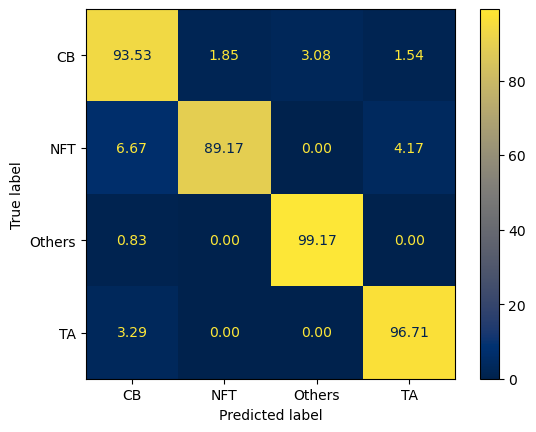

In [7]:
plot = ConfusionMatrixDisplay(final_cm_t,
                              display_labels=['CB','NFT','Others','TA'])
plot.plot(cmap='cividis', values_format='.2f')         
plt.show()

In [8]:
x = np.array([[93.52850539,  1.84899846,  1.54083205,  3.0816641 ],
       [ 6.66666667, 89.16666667,  4.16666667,  0.        ],
       [ 0.82730093,  0.        ,  96.70781893 ,  0      ],
       [ 3.29218107,  0.        ,  0. , 99.17269907   ]])

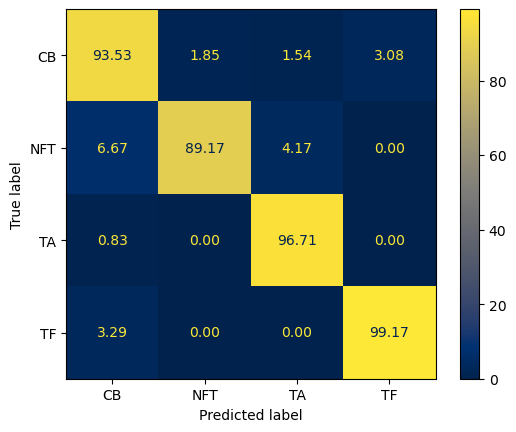

In [9]:
plot = ConfusionMatrixDisplay(x,
                              display_labels=['CB','NFT','TA','TF'])
plot.plot(cmap='cividis', values_format='.2f')         
plt.show()

In [22]:
model = loaded_model
# Confusion matrix across 10 folds, WITH thresholding 
print('Macro avg F1 ', 
      mean([i['macro avg']['f1-score'] for i in model.cv_reportsT])*100)
print('Macro avg F1 std ', 
      np.std([i['macro avg']['f1-score'] for i in model.cv_reportsT])*100)

print("--------------------------")
print('Macro avg precision',
      mean([i['macro avg']['precision'] for i in model.cv_reportsT])*100)
print('Macro avg precision std',
      np.std([i['macro avg']['precision'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('Macro avg recall ',
      mean([i['macro avg']['recall'] for i in model.cv_reportsT])*100)
print('Macro avg recall std',
      np.std([i['macro avg']['recall'] for i in model.cv_reportsT])*100)

Macro avg F1  94.46453764033144
Macro avg F1 std  2.12427997342512
--------------------------
Macro avg precision 95.07635891957335
Macro avg precision std 2.4911460287618956
--------------------------
Macro avg recall  94.60684324317958
Macro avg recall std 2.7205385749291264


In [24]:
model = loaded_model
# Confusion matrix across 10 folds, WITH NO thresholding 
print('Macro avg F1 ', 
      mean([i['macro avg']['f1-score'] for i in model.cv_reports])*100)
print('Macro avg F1 std ', 
      np.std([i['macro avg']['f1-score'] for i in model.cv_reports])*100)

print("--------------------------")
print('Macro avg precision',
      mean([i['macro avg']['precision'] for i in model.cv_reports])*100)
print('Macro avg precision std',
      np.std([i['macro avg']['precision'] for i in model.cv_reports])*100)
print("--------------------------")
print('Macro avg recall ',
      mean([i['macro avg']['recall'] for i in model.cv_reports])*100)
print('Macro avg recall std',
      np.std([i['macro avg']['recall'] for i in model.cv_reports])*100)

Macro avg F1  91.39460633528196
Macro avg F1 std  2.732391045973433
--------------------------
Macro avg precision 92.05070142420307
Macro avg precision std 3.7333350002600416
--------------------------
Macro avg recall  91.93780451155253
Macro avg recall std 1.70520678159149


Plotting feature importance

In [5]:
import seaborn as sns

In [6]:
model_rf = joblib.load('/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tuning_parameters/Final/results/cortical_random_search_update3.sav')

In [7]:
model_rf.best_params_

{'selector__n_features_to_select': 40,
 'clf__sampling_strategy': 'not majority',
 'clf__random_state': 42,
 'clf__n_estimators': 800,
 'clf__min_samples_split': 2,
 'clf__min_samples_leaf': 1,
 'clf__max_samples': 0.75,
 'clf__max_features': 0.2,
 'clf__max_depth': 10,
 'clf__class_weight': 'balanced'}

In [15]:
#With feature selection
rf_result = model_rf.best_estimator_.named_steps['selector'].get_support(indices=True)
rf_result
rf_result_f = [cortical_data.c2_X_train.columns[i] for i in rf_result]
# (rf_result_f)
importance = model_rf.best_estimator_.named_steps['clf'].feature_importances_
f_importance = pd.DataFrame(data={'features':rf_result_f,'importance':importance})
f_importance = f_importance.sort_values(by=['importance'],ascending=False)

In [16]:
f_importance_subset = f_importance[0:11]
features = [i.replace('ROI: 0.25 µm per pixel: ','') for i in f_importance_subset['features']]
f_importance_subset = f_importance_subset.copy()
f_importance_subset.loc[:,'features'] = features
f_importance_subset = f_importance_subset.rename(columns={'features':'Feature',
                                    'importance':'Importance'})

In [17]:
f_importance_subset

,Feature,Importance
4,Min diameter µm,0.129815
0,Area µm^2,0.129211
2,Length µm,0.091414
3,Max diameter µm,0.067562
20,DAB: Median,0.049342
5,Blue: Mean,0.046621
19,DAB: Mean,0.035766
16,DAB: Haralick Sum average (F5),0.035205
22,Green: Mean,0.033336
6,Blue: Median,0.032673


<Axes: xlabel='Importance', ylabel='Feature'>

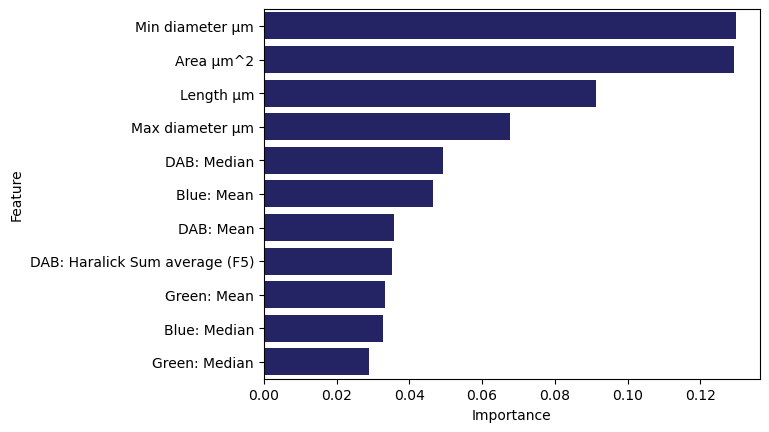

In [18]:
sns.barplot(data=f_importance_subset,
            y="Feature",
            x="Importance",
            color='midnightblue')

Finding PR-AUC

In [19]:
keys = ['split0_test_PR_AUC',
        'split1_test_PR_AUC',
        'split2_test_PR_AUC',
        'split3_test_PR_AUC',
        'split4_test_PR_AUC',
        'split5_test_PR_AUC',
        'split6_test_PR_AUC',
        'split7_test_PR_AUC',
        'split8_test_PR_AUC',
        'split9_test_PR_AUC']
pr_val = []
for i in keys:
    pr_val.append(model_rf.cv_results_[i][model_rf.best_index_])

In [20]:
print(model_rf.cv_results_['mean_test_PR_AUC'][model_rf.best_index_]*100)
print('mean pr:', mean(pr_val)*100)
print('std pr:', np.std(pr_val)*100)

97.67514582962116
mean pr: 97.67514582962116
std pr: 1.0252078940744491
